In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import statsmodels.api as sm
from subprocess import call
from IPython.display import Image
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# load classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# Hierarchical Cluster
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering


In [2]:
df = pd.read_csv("/content/drive/MyDrive/ML/Class 1 - EDA/Datasets/Problem4_Online_retail.csv")
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [3]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [4]:
df.duplicated().sum()

5268

In [6]:
df.shape[0]

541909

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
df.describe(percentiles = [0.25, .5, .75, .98, .995]).T

,count,mean,std,min,25%,50%,75%,98%,99.5%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,72.00,160.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,14.95,24.96,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18119.00,18241.00,18287.0


In [10]:
df["InvoiceNo"].str.startswith("C").sum()

9288

In [12]:
transaction = df.dropna()[~df.dropna()["InvoiceNo"].str.startswith("C")]
transaction.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [13]:
transaction.shape[0]

397924

=> Filter out all the null values and-or values start with "C" for cancelled transaction.

In [23]:
filtered_transaction = transaction[transaction["Description"].isin(transaction["Description"].value_counts()[transaction["Description"].value_counts()>1].index)][["InvoiceNo", "Description"]].groupby("InvoiceNo")["Description"].apply(list).reset_index(name = "col2")["col2"].to_list()



In [15]:
(transaction['Description'].value_counts().to_frame()>1).sum()

,0
count,3664


In [24]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [25]:
te = TransactionEncoder()
te_ary = te.fit(filtered_transaction).transform(filtered_transaction)
new_df = pd.DataFrame(te_ary, columns=te.columns_)
new_df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,...,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
new_df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(18532, 3664)

In [27]:
def unit_encoder(x):
  if x == False:
    return 0
  if x == True:
    return 1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
new_df = new_df.applymap(unit_encoder)
new_df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-28-560353c4ddec>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_df = new_df.applymap(unit_encoder)


,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,...,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
new_df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index([' 4 PURPLE FLOCK DINNER CANDLES', ' 50'S CHRISTMAS GIFT BAG LARGE',
       ' DOLLY GIRL BEAKER', ' I LOVE LONDON MINI BACKPACK',
       ' NINE DRAWER OFFICE TIDY', ' OVAL WALL MIRROR DIAMANTE ',
       ' RED SPOT GIFT BAG LARGE', ' SET 2 TEA TOWELS I LOVE LONDON ',
       ' SPACEBOY BABY GIFT SET', ' TRELLIS COAT RACK',
       ...
       'ZINC METAL HEART DECORATION', 'ZINC SWEETHEART SOAP DISH',
       'ZINC SWEETHEART WIRE LETTER RACK', 'ZINC T-LIGHT HOLDER STAR LARGE',
       'ZINC T-LIGHT HOLDER STARS LARGE', 'ZINC T-LIGHT HOLDER STARS SMALL',
       'ZINC TOP  2 DOOR WOODEN SHELF ', 'ZINC WILLIE WINKIE  CANDLE STICK',
       'ZINC WIRE KITCHEN ORGANISER', 'ZINC WIRE SWEETHEART LETTER TRAY'],
      dtype='object', length=3664)

In [33]:
# applying the apriori algorithm
frequent_itemsets = apriori(new_df, min_support=0.02, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.021692,(3 STRIPEY MICE FELTCRAFT),1
1,0.039175,(6 RIBBONS RUSTIC CHARM),1
2,0.025146,(60 CAKE CASES VINTAGE CHRISTMAS),1
3,0.035452,(60 TEATIME FAIRY CAKE CASES),1
4,0.027034,(72 SWEETHEART FAIRY CAKE CASES),1
...,...,...,...
238,0.023527,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",2
239,0.024552,"(WHITE HANGING HEART T-LIGHT HOLDER, RED HANGI...",2
240,0.022664,"(REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU...",2
241,0.025254,"(WOODEN PICTURE FRAME WHITE FINISH, WOODEN FRA...",2


In [34]:
# top single items
frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.05) ][['itemsets','support']].sort_values(by='support', ascending=False).reset_index(drop=True).style.background_gradient(cmap='Blues')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,itemsets,support
0,frozenset({'WHITE HANGING HEART T-LIGHT HOLDER'}),0.106357
1,frozenset({'REGENCY CAKESTAND 3 TIER'}),0.091949
2,frozenset({'JUMBO BAG RED RETROSPOT'}),0.086337
3,frozenset({'PARTY BUNTING'}),0.074466
4,frozenset({'ASSORTED COLOUR BIRD ORNAMENT'}),0.074196
5,frozenset({'LUNCH BAG RED RETROSPOT'}),0.069501
6,frozenset({'SET OF 3 CAKE TINS PANTRY DESIGN '}),0.061839
7,frozenset({'POSTAGE'}),0.059303
8,frozenset({'LUNCH BAG BLACK SKULL.'}),0.056767
9,frozenset({'PACK OF 72 RETROSPOT CAKE CASES'}),0.055526


In [35]:
# top double items
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.02) ][['itemsets','support']].sort_values(by='support', ascending=False).reset_index(drop=True).style.background_gradient(cmap='Greens')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,itemsets,support
0,"frozenset({'JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'})",0.029463
1,"frozenset({'GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '})",0.029193
2,"frozenset({'ALARM CLOCK BAKELIKE RED ', 'ALARM CLOCK BAKELIKE GREEN'})",0.028599
3,"frozenset({'LUNCH BAG RED RETROSPOT', 'LUNCH BAG PINK POLKADOT'})",0.028221
4,"frozenset({'LUNCH BAG RED RETROSPOT', 'LUNCH BAG BLACK SKULL.'})",0.027898
5,"frozenset({'WOODEN PICTURE FRAME WHITE FINISH', 'WOODEN FRAME ANTIQUE WHITE '})",0.025254
6,"frozenset({'LUNCH BAG SPACEBOY DESIGN ', 'LUNCH BAG RED RETROSPOT'})",0.025200
7,"frozenset({'LUNCH BAG PINK POLKADOT', 'LUNCH BAG BLACK SKULL.'})",0.025038
8,"frozenset({'GARDENERS KNEELING PAD KEEP CALM ', 'GARDENERS KNEELING PAD CUP OF TEA '})",0.024984
9,"frozenset({'PINK REGENCY TEACUP AND SAUCER', 'GREEN REGENCY TEACUP AND SAUCER'})",0.024822


In [38]:
# top triple items
frequent_itemsets[ (frequent_itemsets['length'] == 3) &
                   (frequent_itemsets['support'] >= 0.02) ][['itemsets','support']].sort_values(by='support', ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,itemsets,support
0,"frozenset({'PINK REGENCY TEACUP AND SAUCER', 'GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '})",0.021045


In [39]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.02)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("lift",ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length,consequents_length
73,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.030002,0.029193,0.021045,0.701439,24.027846,0.020169,3.251619,0.988024,1,2
72,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.029193,0.030002,0.021045,0.720887,24.027846,0.020169,3.475290,0.987201,2,1
74,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.037287,0.023527,0.021045,0.564399,23.989564,0.020167,2.241671,0.995432,1,2
71,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.023527,0.037287,0.021045,0.894495,23.989564,0.020167,9.124846,0.981405,2,1
8,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.030002,0.037287,0.024822,0.827338,22.188466,0.023703,5.575714,0.984468,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.042629,0.086337,0.021368,0.501266,5.805911,0.017688,1.831964,0.864620,1,1
60,(PARTY BUNTING),(SPOTTY BUNTING),0.074466,0.054123,0.020991,0.281884,5.208251,0.016960,1.317165,0.873006,1,1
61,(SPOTTY BUNTING),(PARTY BUNTING),0.054123,0.074466,0.020991,0.387836,5.208251,0.016960,1.511907,0.854230,1,1
25,(JUMBO BAG RED RETROSPOT),(LUNCH BAG RED RETROSPOT),0.086337,0.069501,0.022933,0.265625,3.821865,0.016933,1.267062,0.808118,1,1


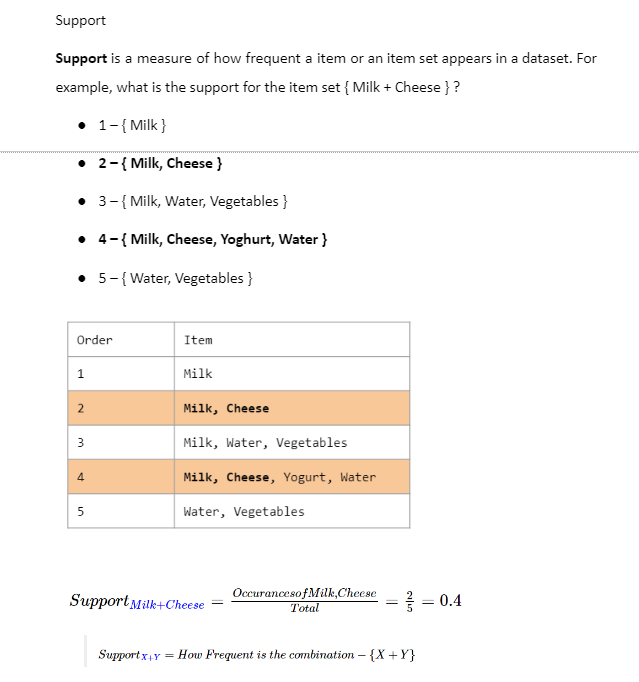

### **Confidence**

Confidence is the probability that the consequent will be present given that the antecedent is present.

Confidence is a measure of how often this rule is found to be true. It is defined as follows.

## 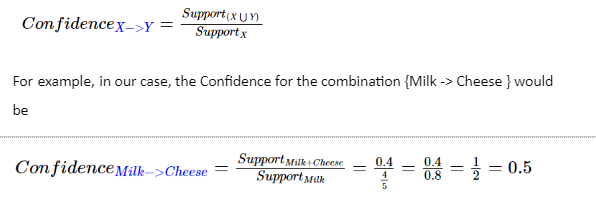

### **Lift**

Lift measures how much more likely the consequent is to appear when the antecedent is present, compared to how often the consequent appears on its own. A lift greater than 1 indicates a strong positive association.

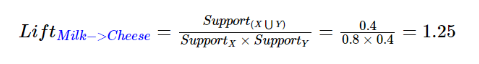

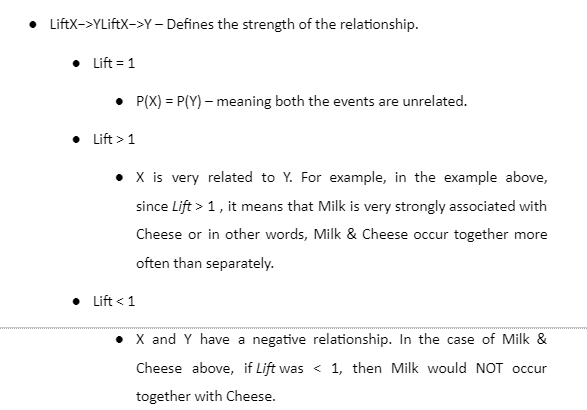



In [40]:
rules.sort_values("confidence",ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length,consequents_length
71,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.023527,0.037287,0.021045,0.894495,23.989564,0.020167,9.124846,0.981405,2,1
70,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.024822,0.042251,0.021045,0.847826,20.066300,0.019996,6.293778,0.974350,2,1
8,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.030002,0.037287,0.024822,0.827338,22.188466,0.023703,5.575714,0.984468,1,1
62,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.030002,0.042251,0.023527,0.784173,18.559754,0.022259,4.437569,0.975384,1,1
12,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.037287,0.042251,0.029193,0.782923,18.530185,0.027617,4.412029,0.982675,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19,(JUMBO BAG RED RETROSPOT),(JUMBO BAG STRAWBERRY),0.086337,0.035290,0.022340,0.258750,7.332041,0.019293,1.301463,0.945220,1,1
21,(JUMBO BAG RED RETROSPOT),(JUMBO SHOPPER VINTAGE RED PAISLEY),0.086337,0.042629,0.021368,0.247500,5.805911,0.017688,1.272254,0.905982,1,1
66,(REGENCY CAKESTAND 3 TIER),(ROSES REGENCY TEACUP AND SAUCER ),0.091949,0.042251,0.022664,0.246479,5.833648,0.018779,1.271031,0.912483,1,1
64,(WHITE HANGING HEART T-LIGHT HOLDER),(RED HANGING HEART T-LIGHT HOLDER),0.106357,0.036639,0.024552,0.230847,6.300533,0.020655,1.252496,0.941408,1,1


In [41]:
rules.sort_values("support",ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length,consequents_length
17,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.086337,0.047000,0.029463,0.341250,7.260672,0.025405,1.446680,0.943753,1,1
16,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.047000,0.086337,0.029463,0.626866,7.260672,0.025405,2.448616,0.904797,1,1
12,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.037287,0.042251,0.029193,0.782923,18.530185,0.027617,4.412029,0.982675,1,1
13,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.042251,0.037287,0.029193,0.690932,18.530185,0.027617,3.114894,0.987768,1,1
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.042575,0.047324,0.028599,0.671736,14.194548,0.026584,2.902169,0.970886,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
36,(LUNCH BAG APPLE DESIGN),(LUNCH BAG RED RETROSPOT),0.046730,0.069501,0.020991,0.449192,6.463059,0.017743,1.689333,0.886710,1,1
55,(LUNCH BAG SUKI DESIGN ),(LUNCH BAG SPACEBOY DESIGN ),0.048511,0.053313,0.020397,0.420467,7.886739,0.017811,1.633534,0.917724,1,1
54,(LUNCH BAG SPACEBOY DESIGN ),(LUNCH BAG SUKI DESIGN ),0.053313,0.048511,0.020397,0.382591,7.886739,0.017811,1.541101,0.922380,1,1
10,(GREEN REGENCY TEACUP AND SAUCER),(REGENCY CAKESTAND 3 TIER),0.037287,0.091949,0.020181,0.541245,5.886352,0.016753,1.979379,0.862267,1,1


In [42]:
rules.sort_values("leverage",ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length,consequents_length
12,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.037287,0.042251,0.029193,0.782923,18.530185,0.027617,4.412029,0.982675,1,1
13,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.042251,0.037287,0.029193,0.690932,18.530185,0.027617,3.114894,0.987768,1,1
0,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.047324,0.042575,0.028599,0.604333,14.194548,0.026584,2.419774,0.975725,1,1
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.042575,0.047324,0.028599,0.671736,14.194548,0.026584,2.902169,0.970886,1,1
17,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.086337,0.047000,0.029463,0.341250,7.260672,0.025405,1.446680,0.943753,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
60,(PARTY BUNTING),(SPOTTY BUNTING),0.074466,0.054123,0.020991,0.281884,5.208251,0.016960,1.317165,0.873006,1,1
25,(JUMBO BAG RED RETROSPOT),(LUNCH BAG RED RETROSPOT),0.086337,0.069501,0.022933,0.265625,3.821865,0.016933,1.267062,0.808118,1,1
24,(LUNCH BAG RED RETROSPOT),(JUMBO BAG RED RETROSPOT),0.069501,0.086337,0.022933,0.329969,3.821865,0.016933,1.363613,0.793497,1,1
10,(GREEN REGENCY TEACUP AND SAUCER),(REGENCY CAKESTAND 3 TIER),0.037287,0.091949,0.020181,0.541245,5.886352,0.016753,1.979379,0.862267,1,1


In [43]:
# top combo with antecedents_length = 1 with high confidence and lift score
rules[(rules['antecedents_length']==1)&(rules['lift']>=1.2)&(rules['confidence']>=0.5)].sort_values("confidence",ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length,consequents_length
8,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.030002,0.037287,0.024822,0.827338,22.188466,0.023703,5.575714,0.984468,1,1
62,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.030002,0.042251,0.023527,0.784173,18.559754,0.022259,4.437569,0.975384,1,1
12,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.037287,0.042251,0.029193,0.782923,18.530185,0.027617,4.412029,0.982675,1,1
7,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.034265,0.040794,0.024984,0.729134,17.873424,0.023586,3.541254,0.977547,1,1
73,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.030002,0.029193,0.021045,0.701439,24.027846,0.020169,3.251619,0.988024,1,2
13,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.042251,0.037287,0.029193,0.690932,18.530185,0.027617,3.114894,0.987768,1,1
4,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX ),0.033240,0.037988,0.022879,0.688312,18.119023,0.021617,3.086454,0.977294,1,1
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.042575,0.047324,0.028599,0.671736,14.194548,0.026584,2.902169,0.970886,1,1
65,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.036639,0.106357,0.024552,0.670103,6.300533,0.020655,2.708857,0.873280,1,1
9,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.037287,0.030002,0.024822,0.665702,22.188466,0.023703,2.901595,0.991917,1,1


In [44]:
# top combo with antecedents_length = 2 with high confidence and lift score
rules[(rules['antecedents_length']==2)&(rules['lift']>=1.2)&(rules['confidence']>=0.5)].sort_values("confidence",ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length,consequents_length
71,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.023527,0.037287,0.021045,0.894495,23.989564,0.020167,9.124846,0.981405,2,1
70,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.024822,0.042251,0.021045,0.847826,20.066300,0.019996,6.293778,0.974350,2,1
72,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.029193,0.030002,0.021045,0.720887,24.027846,0.020169,3.475290,0.987201,2,1
